In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

random.seed(50)

# Importing the dataset

dataset = pd.read_csv('PS_20174392719_1491204439457_log.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)
dataset.drop('step', axis=1, inplace=True)

In [31]:
dataset.groupby('type').size()

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
dtype: int64

In [32]:
dataset.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
dataset.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [34]:

sample_dataframe = dataset.sample(n=1000000)
X = sample_dataframe.iloc[:, :-1]
y = sample_dataframe.iloc[:, 6]

print(sample_dataframe.isFraud.value_counts())

0    998768
1      1232
Name: isFraud, dtype: int64


In [35]:
sample_dataframe.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [36]:
y.shape

(1000000,)

In [37]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
dummies=pd.get_dummies(X.type,drop_first='True')
X=X.join(dummies)

In [38]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6101194,PAYMENT,37111.76,580.0,0.00,0.00,0.00,0,0,1,0
4565749,CASH_OUT,321344.77,0.0,0.00,436249.18,757593.95,1,0,0,0
5541302,PAYMENT,13215.47,51378.0,38162.53,0.00,0.00,0,0,1,0
4781933,PAYMENT,3075.93,5090.0,2014.07,0.00,0.00,0,0,1,0
3577100,CASH_OUT,93640.13,35457.0,0.00,1686321.29,1779961.42,1,0,0,0


In [39]:
X.drop('type', axis=1, inplace=True)

In [40]:
X.shape

(1000000, 9)

In [41]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

counts = np.unique(y_train, return_counts=True)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)
X_test = sc.transform(X_test)


In [43]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import LinearSVC
import lightgbm
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

C:\Users\satish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\satish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\satish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base mod

In [44]:
from imblearn.over_sampling import SMOTE
# Apply the sampling
ada = ADASYN(random_state=1,ratio=.005,n_neighbors=3)
sm=SMOTE(random_state=1,ratio=.005,k_neighbors=3)
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
count = np.unique(y_resampled, return_counts=True)
clf=lightgbm.LGBMClassifier(random_state=1,n_estimators=40,iter=1000,learning_rate=0.03)
# Create a pipeline

pipeline4 = make_pipeline(ada,clf)
#pipeline4 = make_pipeline(sm,clf)
pipeline4.fit(X_train,y_train)
model=clf.fit(X_train, y_train)
print(count)

C:\Users\satish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\satish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(array([0, 1], dtype=int64), array([699137,   3495], dtype=int64))


In [45]:
pipeline =make_pipeline(sm,clf)
modelsm=clf.fit(X_resampled,y_resampled)

In [46]:
y_predict=pipeline.predict(X_test)

In [47]:
from lightgbm import plot_importance
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm = confusion_matrix(y_test, pipeline4.predict(X_test))
print(cm)

[[149801     19]
 [    40    140]]


In [49]:
count1= np.unique(y_test, return_counts=True)
count1

(array([0, 1], dtype=int64), array([149820,    180], dtype=int64))

In [50]:
count2= np.unique(y_val, return_counts=True)
count2

(array([0, 1], dtype=int64), array([149811,    189], dtype=int64))

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm1 = confusion_matrix(y_val, pipeline.predict(X_val))
print(cm1)

[[ 49372 100439]
 [     0    189]]


In [53]:
# Classify and report the results
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_val, pipeline4.predict(X_val)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.33      1.00      0.50      0.57      0.31    149811
          1       0.00      1.00      0.33      0.00      0.57      0.35       189

avg / total       1.00      0.33      1.00      0.50      0.57      0.31    150000



In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm = confusion_matrix(y_val, pipeline4.predict(X_val))
roc = roc_auc_score(y_val, pipeline4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, pipeline4.predict(X_val))
roc_auc = auc(fpr,tpr)

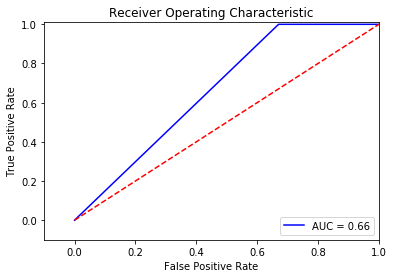

In [55]:
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
importance_score =clf.feature_importances_


In [57]:
importance_score

array([440, 398,  79,  59, 111,  44,   9,  47,  13])

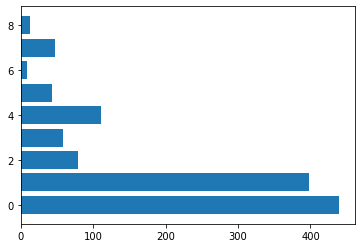

In [58]:
plt.barh(range(len(importance_score)), importance_score)
plt.show()

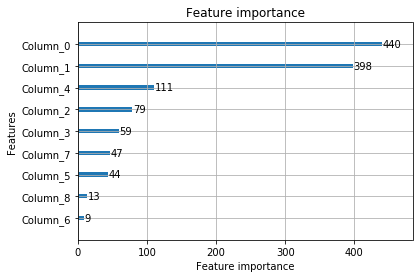

In [59]:
lightgbm.plot_importance(clf)

In [62]:
pipeline.predict([[0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       2.590000e+02, 1.849330e+03, 2.422000e+04, 2.237067e+04]])

ValueError: Number of features of the model must match the input. Model n_features_ is 9 and input n_features is 8 

In [ ]:
pipeline4.predict([[0,0,0,0,1,180,0,21182,0,0]])